In [3]:
import numpy as np

In [4]:
data= np.load('galaxy_catalogue.npy')

In [5]:
for name, value in zip(data.dtype.names, data[0]):
  print('{:10} {:.6}'.format(name, value))

u-g        1.85765
g-r        0.67158
r-i        0.4231
i-z        0.3061
ecc        0.585428
m4_u       2.25195
m4_g       2.33985
m4_r       2.38065
m4_i       2.35974
m4_z       2.39553
petroR50_u 3.09512
petroR50_r 3.81892
petroR50_z 3.82623
petroR90_u 5.17481
petroR90_r 8.26301
petroR90_z 11.4773
class      merger


In [8]:
data.dtype


dtype([('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

In [18]:
for name, value in zip(data.dtype.names, data[0]):
  print('{:12} {:.7}'.format(name, value))

u-g          1.85765
g-r          0.67158
r-i          0.4231
i-z          0.3061
ecc          0.5854284
m4_u         2.251946
m4_g         2.339849
m4_r         2.380652
m4_i         2.359738
m4_z         2.395528
petroR50_u   3.095123
petroR50_r   3.818919
petroR50_z   3.82623
petroR90_u   5.174814
petroR90_r   8.263009
petroR90_z   11.47734
class        merger


In [19]:
data['class']

array(['merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merg

In [20]:
np.random.seed(0)
np.random.shuffle(data)

In [21]:
data['class']

array(['spiral', 'elliptical', 'merger', 'merger', 'elliptical',
       'elliptical', 'spiral', 'spiral', 'merger', 'spiral', 'merger',
       'elliptical', 'spiral', 'spiral', 'merger', 'spiral', 'elliptical',
       'elliptical', 'merger', 'elliptical', 'spiral', 'merger',
       'elliptical', 'spiral', 'merger', 'spiral', 'spiral', 'spiral',
       'spiral', 'spiral', 'merger', 'elliptical', 'merger', 'spiral',
       'elliptical', 'elliptical', 'merger', 'merger', 'spiral', 'merger',
       'elliptical', 'spiral', 'elliptical', 'merger', 'merger', 'merger',
       'spiral', 'elliptical', 'elliptical', 'merger', 'elliptical',
       'elliptical', 'elliptical', 'elliptical', 'spiral', 'elliptical',
       'elliptical', 'merger', 'merger', 'merger', 'merger', 'elliptical',
       'elliptical', 'spiral', 'spiral', 'elliptical', 'elliptical',
       'elliptical', 'elliptical', 'elliptical', 'elliptical', 'spiral',
       'spiral', 'merger', 'spiral', 'spiral', 'spiral', 'spiral',
      

In [45]:
def splitdata_train_test(data, fraction_training):
  # complete this function
  #data=np.load('galaxy_catalogue.npy')
  np.random.seed(0)
  np.random.shuffle(data)
  split_index = int(fraction_training*len(data))
  return data[0:split_index], data[split_index:]

In [46]:
fraction_training = 0.7

  # split the data using your function
training, testing = splitdata_train_test(data, fraction_training)


In [47]:
print('Number data galaxies:', len(data))
print('Train fraction:', fraction_training)
print('Number of galaxies in training set:', len(training))
print('Number of galaxies in testing set:', len(testing))

Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234


In [48]:
def generate_features_targets(data):
  # complete the function by calculating the concentrations

  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


In [49]:
features, targets = generate_features_targets(data)

In [50]:
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


In [51]:
from sklearn.tree import DecisionTreeClassifier
def dtc_predict_actual(data):
  np.random.seed(0)
  np.random.shuffle(data)
  train, test = splitdata_train_test(data, 0.7)
  
  
  # split the data into training and testing sets using a training fraction of 0.7
  #np.random.seed(0)
  #np.random.shuffle(features)
  #np.random.shuffle(targets)
  train_features, train_targets = generate_features_targets(train)
  test_features, test_targets = generate_features_targets(test)
    
    
  
  

  # generate the feature and targets for the training and test sets
  
  # i.e. train_features, train_targets, test_features, test_targets


  # instantiate a decision tree classifier
  dtc=DecisionTreeClassifier()

  # train the classifier with the train_features and train_targets
  dtc.fit(train_features,train_targets)

  # get predictions for the test_features
  predictions=dtc.predict(test_features)

  # return the predictions and the test_targets
  return predictions,test_targets


In [52]:
predicted_class, actual_class = dtc_predict_actual(data)

In [54]:
print("Some initial results...\n   predicted,  actual")
for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))

Some initial results...
   predicted,  actual
0. elliptical, elliptical
1. elliptical, merger
2. elliptical, elliptical
3. elliptical, elliptical
4. spiral, spiral
5. merger, merger
6. elliptical, elliptical
7. elliptical, elliptical
8. spiral, spiral
9. spiral, merger


In [55]:
def calculate_accuracy(predicted, actual):
  return sum(predicted == actual)/len(actual)
  

Our accuracy score: 0.7987179487179488
Confusion matrix, without normalization
[[236  22   2]
 [ 22 178  60]
 [  3  48 209]]


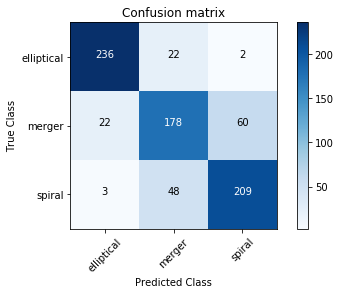

In [64]:

from sklearn.tree import DecisionTreeClassifier
import numpy as np
import itertools
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
features, targets = generate_features_targets(data)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')


  # train the model to get predicted and actual classes
dtc = DecisionTreeClassifier()
predicted = cross_val_predict(dtc, features, targets, cv=10)

  # calculate the model score using your function
model_score = calculate_accuracy(predicted, targets)
print("Our accuracy score:", model_score)

  # calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(targets))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

  # Plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()

In [66]:
def rf_predict_actual(data, n_estimators):
  # generate the features and targets\
  features,targets=generate_features_targets(data)
    
  # instantiate a random forest classifier using n estimators
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  
  
  # get predictions using 10-fold cross validation with cross_val_predict
  predicted = cross_val_predict(rfc, features, targets, cv=10)

  # return the predictions and their actual classes
  return predicted, targets


Accuracy score: 0.8692307692307693
Confusion matrix, without normalization
[[249  10   1]
 [ 12 214  34]
 [  2  43 215]]


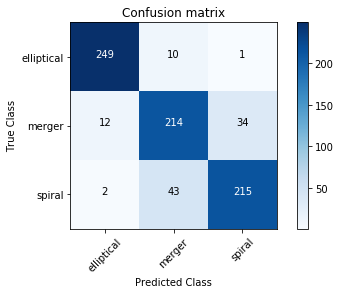

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
#from support_functions import generate_features_targets, plot_confusion_matrix, calculate_accuracy
number_estimators = 50              # Number of trees
predicted, actual = rf_predict_actual(data, number_estimators)

  # calculate the model score using your function
accuracy = calculate_accuracy(predicted, actual)
print("Accuracy score:", accuracy)

  # calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(actual))
model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

  # plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()
